In [64]:
# 所有用到的包
import numpy as np
import cv2
import matplotlib.pyplot as plt

【例】核心功能代码

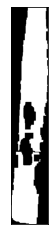

In [269]:
# 色彩空间转换：⬇️
# https://blog.csdn.net/keith_bb/article/details/53470170?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&utm_relevant_index=2

img = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/assets/images/污染检测/污染/绝缘层污染 (21).tif', cv2.IMREAD_COLOR)
# img = cv2.imread(
#     '/Users/zhouxinyu/Code/Python/jupyter/assets/images/污染检测/污染/绝缘层污染 (20).tif', cv2.IMREAD_COLOR)
# img = cv2.imread(
#     '/Users/zhouxinyu/Code/Coding/zf_back_py/detection/contamination_detect/assets/正常图片/normal-1.tif', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

binarized = binarizeWhite(hsv) # 原图二值化后的图像
preProcessed = preProcess(binarized) # 原图二值化图像预处理后的图像

cutted_img = np.transpose(cutVerticalBlack(np.transpose(
    cutVerticalBlack(np.transpose(preProcessed))
)))

showImages([cutted_img])

# de_img, de_countours = drawEdge(preProcessed, 20)
# 
# showImages([np.transpose(preProcessed)])

# showImages([binarized, preProcessed, de_img],['binarized','preProcessed', 'drawEdge'],[2,2])

# allEdgesLen, counter = getEdges(preProcessed, 10)
# print("allEdgesLen: ", allEdgesLen)
# print("非连通性污染检测存在异常点个数: ", counter)

[3, 13, 4, 7, 2, 1, 3, 2, 2, 4, 45, 5, 7, 3, 11, 12, 27, 6, 15, 33, 0, 1, 14]


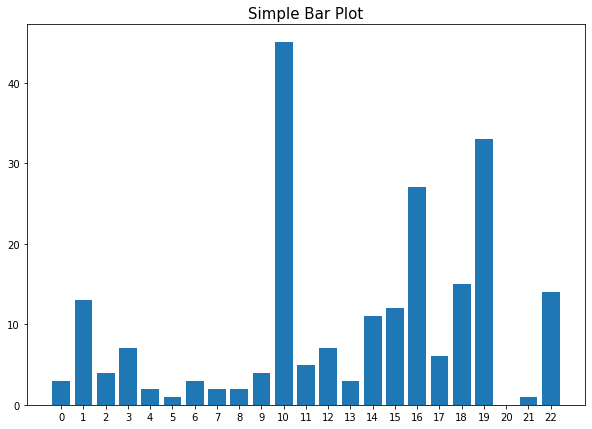

In [270]:
def getPixelNumber(list):
    return len(list) - int(sum(list) / 255)


pollutionList = list(map(getPixelNumber, cutted_img))
pollutionListRate = []
footLen = 25
start = int(0.15 * len(pollutionList))
end = len(pollutionList) - start

for i in range(start, end, footLen):
    pollutionListRate.append(abs(pollutionList[i] - pollutionList[i-footLen]))

# for size in pollutionList:
#     cha = size - preSize
#     pollutionListRate.append(cha)
#     preSize = size

getChart(pollutionListRate)
# print(pollutionList)
print(pollutionListRate)


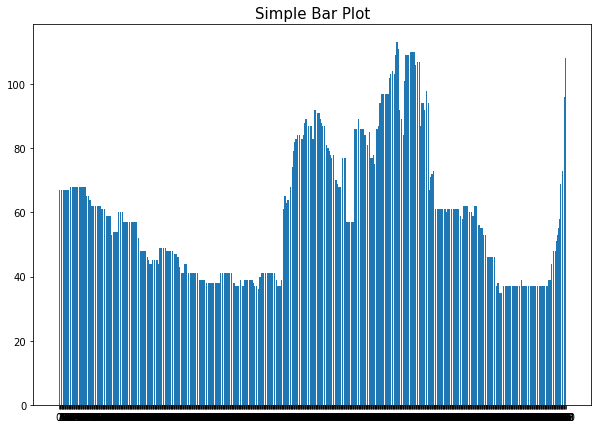

In [271]:
getChart(pollutionList)

In [ ]:
p_start = int(len(pollutionList)*0.2)
p_end = len(pollutionList) - p_start
getChart(pollutionList[p_start: p_end])

In [104]:

def getChart(arr):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(x=list(map(str, range(0, len(arr)))), height=arr)
    ax.set_title("Simple Bar Plot", fontsize=15)

In [9]:
def cutVerticalBlack(img):
    new_img = []
    for i in range(0, len(img)):
        sizes = int(sum(img[i]) / 255)
        if sizes > 20:
            new_img.append(img[i])
    return new_img

cutted_1 = cutVerticalBlack(np.transpose(preProcessed))
cutted_2 = np.transpose(cutted_1)
cutted_img = cutVerticalBlack(np.transpose(
    cutVerticalBlack(np.transpose(preProcessed))
))
# print(cutVerticalBlack(cutted_2))
# print(sum(cutted_2[800]))
# showImages([cutted_img])


In [78]:
sizes = int(sum(transpose[1000]) / 255)
print(sizes == 0)

True


In [33]:
print(len(de_countours[0]))
edge = de_countours[0]

372


In [23]:
for i in range(1, 10, 2):
    print(i)

1
3
5
7
9


All Touples:  11
430
301
250
295
minLen:  10
Len > minLen:  4


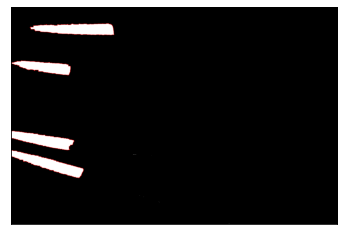

In [117]:
de_img, de_countours = drawEdge(preProcessed)
# print(len(de_countours))
showImages([de_img])


In [1]:
def binarizeWhite(hsvImage):
    lower=np.array([0,0,221])
    upper=np.array([180,80,255])
    mask = cv2.inRange(hsvImage, lower, upper)
    return mask

def preProcess(binarizedImg):
    # 开：先腐蚀，再膨胀
    # 作用：腐蚀 > 膨胀，会放大比较小的污染，让边缘平滑一些，减少一些毛边
    opening_kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(binarizedImg, cv2.MORPH_OPEN, opening_kernel)
    
    # 腐蚀，
    # 作用：去除掉右侧
    erosion_kernel = np.ones((5,5), np.uint8)
    erosion_opening = cv2.erode(opening, erosion_kernel, iterations = 3)
    
    # 闭操作：先膨胀，再腐蚀
    closing_kernel = np.ones((20,20), np.uint8)
    closing = cv2.morphologyEx(erosion_opening, cv2.MORPH_CLOSE, closing_kernel)
    return closing

def getEdges(counterImg, minLen = 10):
    de_contours, de_hierarchy = cv2.findContours(counterImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     print("All Touples: ", len(de_contours))
    allEdgesLen = len(de_contours)
    counter = 0
    for size in de_contours:
        if(len(size) > minLen):
            counter = counter + 1
            print("size -> ", len(size))
    return allEdgesLen, counter

def drawLines(edge):
    counter = []
    slope = []
    prePixel = edge[0]
    print('prePixel -> ', prePixel)
    for i in range(5, len(edge), 20):
        pixel = edge[i]
        denominator = pixel[0][0] - prePixel[0][0]
        if denominator == 0:
            slope.append('denominator is zero')
        else:
            slope.append(
                (pixel[0][1] - prePixel[0][1])/denominator
            )
        prePixel = pixel
    return slope

# 描边，暂时不用
def drawEdge(counterImg, minLen = 10):
    de_contours, de_hierarchy = cv2.findContours(counterImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    de_res = cv2.cvtColor(counterImg, cv2.COLOR_GRAY2BGR)
    print("All Touples: ", len(de_contours))
    edges = []
    counter = 0
    for size in de_contours:
        if(len(size) > minLen):
            edges.append(size)
            de_res = cv2.drawContours(de_res, [size], -1, (255, 0, 0), 2)
            counter = counter + 1
            print(len(size))
    print("minLen: ", minLen)
    print("Len > minLen: ", counter)
    return de_res, edges

辅助代码

In [7]:
def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题
    
def showImages(images, titles = [''], size = [1, 1], BGR = False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b,g,r = cv2.split(images[i])
            showImage = cv2.merge([r,g,b])
        plt.imshow(showImage ,'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
# np.hstack((img1, img2))

In [4]:
def drawLinesCopy(edge):
    counter = []
    slope = []
    prePixel = edge[0]
    print('prePixel -> ', prePixel)
    for pixel in edge:
#         print("pixel -> ", pixel[0])
        denominator = pixel[0][0] - prePixel[0][0]
        if denominator == 0:
            slope.append('denominator is zero')
        else:
            slope.append(
                (pixel[0][1] - prePixel[0][1])/denominator
            )
        prePixel = pixel
    return slope